In [56]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers as opt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.font_manager import FontProperties
from scipy.stats import variation

In [57]:
DATA_PATH="./Vowel_Data/Formant/"

In [58]:
seed=42

In [59]:
def get_formant(file_path):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)
  
            length=len(individual_formant)
            F_i=individual_formant.loc[2:,'F1':'F5'].values
            F_i1=individual_formant.loc[1:length-2,'F1':'F5'].values
            F_i2=individual_formant.loc[:length-3,'F1':'F5'].values
            assert len(F_i)==len(F_i1)==len(F_i2)
            #individual_formant.loc[2:,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2
            
            #individual_formant=individual_formant.dropna()   #drop the first two rows as there are NaN values due to the difference
            
            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
        
        #folder_formant['disp(F5-F1)']=folder_formant['F5']-folder_formant['F1']
        #folder_formant['disp(F4-F3)']=folder_formant['F4']-folder_formant['F3']
        #folder_formant['disp(F5-F3)']=folder_formant['F5']-folder_formant['F3']
        #folder_formant['disp(F5-F4)']=folder_formant['F5']-folder_formant['F4']
        
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)     
    return all_formant

def get_train_test(split_ratio=0.8,random_state=42):
    all_formants=get_all_formants()
    
    y=all_formants['label'].values
 
    only_formants=all_formants.drop(labels=['time','label'],axis=1)
    
    standard_formants=(only_formants-only_formants.mean())/only_formants.std()
    
    X=standard_formants.values   

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [60]:
np.random.seed(seed)

X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)

model_v=Sequential()
model_v.add(Dense(128, activation='tanh',input_shape=(X_train.shape[1],)))
model_v.add(Dense(128, activation='tanh'))
model_v.add(Dense(64, activation='tanh'))
model_v.add(Dense(32, activation='tanh'))
model_v.add(Dense(16, activation='tanh'))
model_v.add(Dense(7, activation='softmax'))

model_v.compile(
    optimizer=opt.Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_v.fit(X_train, y_train_hot, epochs=300, batch_size=X_train.shape[0])
#y_pred=model_v.predict_classes(X_test) #deprecated
y_pred=np.argmax(model_v.predict(X_test), axis=-1)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 303.06it/s]


Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 1.9545 - accuracy: 0.1382
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 1.6421 - accuracy: 0.4086
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5187 - accuracy: 0.4562
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4531 - accuracy: 0.4638
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4113 - accuracy: 0.4744
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 1.3688 - accuracy: 0.4908
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3284 - accuracy: 0.5121
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 1.2943 - accuracy: 0.5231
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2632 - accuracy: 0.5211
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2341 - accuracy: 0.5175
Epoch 11/300
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7919
Epoch 85/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.7919
Epoch 86/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.7930
Epoch 87/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7948
Epoch 88/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7970
Epoch 89/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.7984
Epoch 90/300
1/1 [==============================] - 0s 5ms/step - loss: 0.5663 - accuracy: 0.7994
Epoch 91/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.8003
Epoch 92/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.8026
Epoch 93/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.8046
Epoch 94/300
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8725
Epoch 168/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8736
Epoch 169/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8746
Epoch 170/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8770
Epoch 171/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.8770
Epoch 172/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8788
Epoch 173/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8799
Epoch 174/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8807
Epoch 175/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8792
Epoch 176/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8809
Epoch 177/300
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9156
Epoch 250/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9162
Epoch 251/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.9172
Epoch 252/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.9175
Epoch 253/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9181
Epoch 254/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.9179
Epoch 255/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.9183
Epoch 256/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9205
Epoch 257/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9195
Epoch 258/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9220
Epoch 259/300
1/1 [=====

In [61]:
cnf_matrix_v=confusion_matrix(y_test,y_pred)
normalized_cnf_v=cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:,np.newaxis]
indiv_acc_v=np.diagonal(normalized_cnf)

In [62]:
vowel_variation=pd.DataFrame(index=["time","F1","F2","F3","F4","F5"])
for j in range(1,8):  #number of vowelin each variation
    DATA_PATH_v="./Vowel_Data/Formant/Formant"+str(j)+"/"     
    i=0
    for speechfile in os.listdir(DATA_PATH_v):  #accessing each formant file
        data_v = pd.read_csv(DATA_PATH_v+speechfile, delim_whitespace=True,header=None,names=["time","F1","F2","F3","F4","F5"],dtype=np.float64,na_values="--undefined--")
        if i==0:
            cov_v=variation(data_v,axis=0)  #row to row variation
            i=1;
        else:
            cov_v=np.vstack((cov_v,variation(data_v,axis=0)))
    
    mean_variation_v=cov_v.mean(axis=0)  #row to row mean...mean for all F1, mean for all F2...
    
    vowel_variation['Vowel_'+str(j)]=mean_variation_v

vowel_variation=vowel_variation.drop('time') #discarding the variation of time

In [63]:
vowel_variation.iloc[[0,1]]

,Vowel_1,Vowel_2,Vowel_3,Vowel_4,Vowel_5,Vowel_6,Vowel_7
F1,0.295937,0.344272,0.328788,0.475630,0.422971,0.334010,0.391462
F2,0.182272,0.089591,0.257506,0.216749,0.312302,0.206333,0.493862


In [76]:
per_vowel_avg_F12=vowel_variation.iloc[[0,1]].mean(axis=0)
per_vowel_avg=vowel_variation.mean(axis=0)

In [86]:
per_vowel_avg_F12

Vowel_1    0.239104
Vowel_2    0.216931
Vowel_3    0.293147
Vowel_4    0.346190
Vowel_5    0.367637
Vowel_6    0.270171
Vowel_7    0.442662
dtype: float64

In [65]:
DATA_PATH="./Word_Data/Formant/"

In [66]:
def get_formant(file_path):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)
  
            length=len(individual_formant)
            F_i=individual_formant.loc[2:,'F1':'F5'].values
            F_i1=individual_formant.loc[1:length-2,'F1':'F5'].values
            F_i2=individual_formant.loc[:length-3,'F1':'F5'].values
            assert len(F_i)==len(F_i1)==len(F_i2)
            #individual_formant.loc[2:,['F1_diff2','F2_diff2','F3_diff2','F4_diff2','F5_diff2']]=F_i-2*F_i1+F_i2
            
            #individual_formant=individual_formant.dropna()   #drop the first two rows as there are NaN values due to the difference
            
            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
        
        #folder_formant['disp(F5-F1)']=folder_formant['F5']-folder_formant['F1']
        #folder_formant['disp(F4-F3)']=folder_formant['F4']-folder_formant['F3']
        #folder_formant['disp(F5-F3)']=folder_formant['F5']-folder_formant['F3']
        #folder_formant['disp(F5-F4)']=folder_formant['F5']-folder_formant['F4']
        
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)     
    return all_formant

def get_train_test(split_ratio=0.8,random_state=42):
    all_formants=get_all_formants()
    
    y=all_formants['label'].values
 
    only_formants=all_formants.drop(labels=['time','label'],axis=1)
    
    standard_formants=(only_formants-only_formants.mean())/only_formants.std()
    
    X=standard_formants.values   

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [67]:
np.random.seed(seed)

X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)

model_w=Sequential()
model_w.add(Dense(128, activation='tanh',input_shape=(X_train.shape[1],)))
model_w.add(Dense(128, activation='tanh'))
model_w.add(Dense(64, activation='tanh'))
model_w.add(Dense(32, activation='tanh'))
model_w.add(Dense(16, activation='tanh'))
model_w.add(Dense(7, activation='softmax'))

model_w.compile(
    optimizer=opt.Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_w.fit(X_train, y_train_hot, epochs=300, batch_size=X_train.shape[0])
#y_pred=model_w.predict_classes(X_test)
y_pred=np.argmax(model_w.predict(X_test), axis=-1)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 282.27it/s]


Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 2.0250 - accuracy: 0.0937
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 1.8069 - accuracy: 0.3102
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 1.7462 - accuracy: 0.3301
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 1.7035 - accuracy: 0.3441
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6751 - accuracy: 0.3481
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6569 - accuracy: 0.3494
Epoch 7/300
1/1 [==============================] - 0s 1ms/step - loss: 1.6413 - accuracy: 0.3577
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 1.6297 - accuracy: 0.3680
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 1.6238 - accuracy: 0.3693
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6184 - accuracy: 0.3700
Epoch 11/300
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 1.2132 - accuracy: 0.5456
Epoch 85/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2124 - accuracy: 0.5446
Epoch 86/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2062 - accuracy: 0.5475
Epoch 87/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2032 - accuracy: 0.5487
Epoch 88/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2004 - accuracy: 0.5486
Epoch 89/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1947 - accuracy: 0.5503
Epoch 90/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1935 - accuracy: 0.5511
Epoch 91/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1892 - accuracy: 0.5522
Epoch 92/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1845 - accuracy: 0.5546
Epoch 93/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1834 - accuracy: 0.5560
Epoch 94/300
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 0.9792 - accuracy: 0.6433
Epoch 168/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9791 - accuracy: 0.6447
Epoch 169/300
1/1 [==============================] - 0s 973us/step - loss: 0.9782 - accuracy: 0.6421
Epoch 170/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9811 - accuracy: 0.6454
Epoch 171/300
1/1 [==============================] - 0s 2ms/step - loss: 0.9769 - accuracy: 0.6439
Epoch 172/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9711 - accuracy: 0.6489
Epoch 173/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9638 - accuracy: 0.6505
Epoch 174/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9632 - accuracy: 0.6490
Epoch 175/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9661 - accuracy: 0.6489
Epoch 176/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9611 - accuracy: 0.6516
Epoch 177/300
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.8209 - accuracy: 0.7067
Epoch 250/300
1/1 [==============================] - 0s 2ms/step - loss: 0.8179 - accuracy: 0.7084
Epoch 251/300
1/1 [==============================] - 0s 1ms/step - loss: 0.8152 - accuracy: 0.7122
Epoch 252/300
1/1 [==============================] - 0s 5ms/step - loss: 0.8133 - accuracy: 0.7113
Epoch 253/300
1/1 [==============================] - 0s 2ms/step - loss: 0.8115 - accuracy: 0.7116
Epoch 254/300
1/1 [==============================] - 0s 2ms/step - loss: 0.8109 - accuracy: 0.7130
Epoch 255/300
1/1 [==============================] - 0s 1ms/step - loss: 0.8087 - accuracy: 0.7140
Epoch 256/300
1/1 [==============================] - 0s 3ms/step - loss: 0.8058 - accuracy: 0.7139
Epoch 257/300
1/1 [==============================] - 0s 4ms/step - loss: 0.8060 - accuracy: 0.7143
Epoch 258/300
1/1 [==============================] - 0s 3ms/step - loss: 0.8059 - accuracy: 0.7143
Epoch 259/300
1/1 [=====

In [68]:
cnf_matrix_w=confusion_matrix(y_test,y_pred)
normalized_cnf_w=cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:,np.newaxis]
indiv_acc_w=np.diagonal(normalized_cnf)

In [69]:
word_variation=pd.DataFrame(index=["time","F1","F2","F3","F4","F5"])
for j in range(1,8):  #number of word in each variation
    DATA_PATH_w="./Word_Data/Formant/Formant"+str(j)+"/"     
    i=0
    for speechfile in os.listdir(DATA_PATH_w):  #accessing each formant file
        data_w = pd.read_csv(DATA_PATH_w+speechfile, delim_whitespace=True,header=None,names=["time","F1","F2","F3","F4","F5"],dtype=np.float64,na_values="--undefined--")
        if i==0:
            cov_w=variation(data_w,axis=0)  #row to row variation
            i=1;
        else:
            cov_w=np.vstack((cov_w,variation(data_w,axis=0)))
    
    mean_variation_w=cov_w.mean(axis=0)  #row to row mean...mean for all F1, mean for all F2...
    
    word_variation['Word_'+str(j)]=mean_variation_w

word_variation=word_variation.drop('time') #discarding the variation of time

In [75]:
per_word_avg_F12=word_variation.iloc[[0,1]].mean(axis=0)
per_word_avg=word_variation.mean(axis=0)

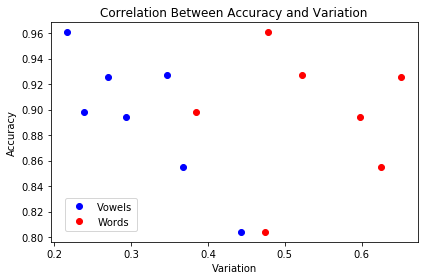

In [81]:
fig, ax=plt.subplots()
#ln1=ax.plot(per_vowel_avg,indiv_acc_v,'bo',label='Vowels')
#ln2=ax.plot(per_word_avg,indiv_acc_w,'ro',label='Words')

ln1=ax.plot(per_vowel_avg_F12,indiv_acc_v,'bo',label='Vowels')
ln2=ax.plot(per_word_avg_F12,indiv_acc_w,'ro',label='Words')

ax.set_title('Correlation Between Accuracy and Variation')
ax.set_xlabel('Variation')
ax.set_ylabel('Accuracy')

ax.legend(loc=(0.04,0.05))
plt.tight_layout()
#plt.savefig('./New_without_CNN/correlation_acc_var.pdf',format='pdf', dpi=600)

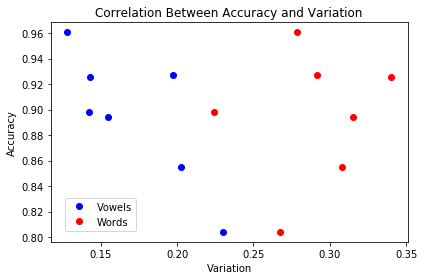

In [80]:
fig, ax=plt.subplots()
ln1=ax.plot(per_vowel_avg,indiv_acc_v,'bo',label='Vowels')
ln2=ax.plot(per_word_avg,indiv_acc_w,'ro',label='Words')

#ln1=ax.plot(per_vowel_avg_F12,indiv_acc_v,'bo',label='Vowels')
#ln2=ax.plot(per_word_avg_F12,indiv_acc_w,'ro',label='Words')

ax.set_title('Correlation Between Accuracy and Variation')
ax.set_xlabel('Variation')
ax.set_ylabel('Accuracy')

ax.legend(loc=(0.04,0.05))
plt.tight_layout()
#plt.savefig('./New_without_CNN/correlation_acc_var.pdf',format='pdf', dpi=600)

In [84]:
np.corrcoef(per_vowel_avg_F12,indiv_acc_v)

array([[ 1.        , -0.83740163],
       [-0.83740163,  1.        ]])

In [85]:
np.corrcoef(per_word_avg_F12,indiv_acc_w)

array([[1.        , 0.02686237],
       [0.02686237, 1.        ]])

In [ ]:
np.corrcoef(per_word_avg_F12,indiv_acc_w)